### Modern Portfolio Theory (MPT)
- Optimizing the weights of two asset classes in a portfolio
- Expected Returns: 𝐸(𝑟_𝑝)=𝑤_aapl 𝐸(𝑟_aapl)+𝑤_qqq 𝐸(𝑟_qqq)
- Where: 𝐸(𝑟_𝑝) = Expected Rate of Return on entire portfolio. w_apple = portion of portfolio allocated to AAPL. w_qqq = portion of portfolio allocated to qqq. 𝐸(𝑟_aapl) = expected return of AAPL. 𝐸(𝑟_qqq) = expected return of QQQ.
- Say you split the weights 50/50; 40/60, 30/70


In [100]:
import numpy as np
import yfinance as yf


apple = yf.download(tickers="AAPL",start="2025-11-10",end="2025-11-25")['Close']
qqq = yf.download(tickers="QQQ",start="2025-11-10",end="2025-11-25")['Close']

# 50/50 split
r_apple = apple.pct_change().dropna()
r_qqq = qqq.pct_change().dropna()

#expected returns of AAPL
e_apple = np.mean(r_apple)


# expected returns of QQQ
e_qqq = np.mean(r_qqq)

# expected Returns 50/50 split
e_r = (0.50) * e_apple + (0.50) * e_qqq

print(f"Results from 50/50 split: {e_r}")


# 40/60 split

e_r = (0.40) * e_apple + (0.60) * e_qqq
print(f"Results from 40/60 split: {e_r}")

# 30/70 split
e_r = (0.30) * e_apple + (0.70) * e_qqq
print(f"Results from 30/70 split: {e_r}")





/tmp/ipykernel_1911/3253259060.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download(tickers="AAPL",start="2025-11-10",end="2025-11-25")['Close']
[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_1911/3253259060.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq = yf.download(tickers="QQQ",start="2025-11-10",end="2025-11-25")['Close']
[*********************100%***********************]  1 of 1 completed

Results from 50/50 split: -0.00019253714170551777
Results from 40/60 split: -0.0007229072597776764
Results from 30/70 split: -0.0012532773778498349


### Optimizing Weights
- To optimize portfolio, maximize weights of sharpe ratio: 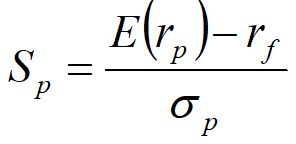

In [ ]:
import pandas as pd
from tools.config import load_config
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from pypfopt import expected_returns,EfficientFrontier,risk_models
from scripts.data_ingestion import DataIngestion
from typing import Any,Dict

class MPT:
    """
    Class for MPT (Modern Portfolio Theory).
    """

    
    def __init__(self,config: dict, data_ingestion: DataIngestion | None = None):
        """
        Initializing class for modern Portfolio Theory.
        
        Args:
            config (dict): configuration file.
            data_ingestion (DataIngestion): DataIngestion module to extract data from yfinance API.
        
        """
        self.config = load_config()
        self.data_ingestion = DataIngestion(self.config)

    
    
    def portfolio_metrics(self) -> Dict[str,Any]:
        """
        Metrics for portfolio optimization using pyportfolioopt.

        Returns:
            Performance (Dict[List,Any]): a dictionary containing a list of items with weights, Expected Returns, Volatility,
            Efficient Frontier, and the sharpe ratio
        """
        # data from data ingestion
        all_prices = self.data_ingestion.fetch_all_prices()
        

        mu = expected_returns.mean_historical_return(all_prices)
        S = risk_models.sample_cov(all_prices)
        ef = EfficientFrontier(mu,S)
            

        weights = ef.max_sharpe(risk_free_rate=0.005)
        weights = ef.clean_weights()


            
        expected_annual_return, annual_volatility, sharpe_ratio = ef.portfolio_performance(verbose=True)
        performance = {
            "weights": weights,
            "expected_annual_return":expected_annual_return,
            "Annual Volatility":annual_volatility,
            "Sharpe Ratio":sharpe_ratio
        }
        return performance


if __name__ == "__main__":
    cofig = load_config()
    obj = MPT(cofig)
    obj.portfolio_metrics()

/home/nickkats1/Portfolio/scripts/data_ingestion.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_prices = yf.download(tickers=self.config['all_prices'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  21 of 21 completed


Expected annual return: 34.4%
Annual volatility: 22.7%
Sharpe Ratio: 1.49


/home/nickkats1/Portfolio/venv/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


In [98]:
# sharpe ratio

sharpe_ratio = (.344 - 0.005)  / .227
print(f"Shapre Ratio: {sharpe_ratio}")


Shapre Ratio: 1.4933920704845813


#### Weights of Optimized Portfolio
- The weights for each asset class have to equal 1.

In [99]:
obj.portfolio_metrics().values()
weights = {'AAPL': 0.0, 'ARKK': 0.0, 'DIA': 0.0, 'EFA': 0.0, 'F': 0.0, 'GM': 0.0, 'GOOGL': 0.05473, 'IWM': 0.0, 'MCD': 0.1728, 'MSFT': 0.0, 'NVDA': 0.3389, 'QQQ': 0.0, 'SBUX': 0.0, 'SPY': 0.0, 'TSLA': 0.0, 'VOO': 0.0, 'VTI': 0.0, 'WMT': 0.43357, 'XLF': 0.0, 'XLK': 0.0, '^GSPC': 0.0}

len_weights = sum((weights.values()))
print(f'sum of weights: {len_weights}')

0.05473 + .1728 + 0.3389 + .43357
      
      

/home/nickkats1/Portfolio/scripts/data_ingestion.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_prices = yf.download(tickers=self.config['all_prices'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  21 of 21 completed


Expected annual return: 34.4%
Annual volatility: 22.7%
Sharpe Ratio: 1.49
sum of weights: 1.0


/home/nickkats1/Portfolio/venv/lib/python3.12/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


1.0